<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Tackle Regression
</font>
</h1>

<p>
<font face="vazir" size=5>
In this notebook, we will try linear regression on the Housing dataset. First, we will try simple linear regression, then we will try multiple linear regression and polynomial regression with regularization.
We try to solve the problem using both normal equation and gradient descent.
</font>
</p>

In [1]:
# Import libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
# Load data
df = pd.read_csv('Housing.csv')
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
# Set area as x (the only feature) and price as y (the target)
x = df[['area']]
y = df[['price']]

In [6]:
# Divide by 10000 to make the numbers smaller
x = x / 10000
y = y / 10000

In [7]:
# To include bias calculation, add a column of 1s to x
X = np.c_[np.ones(x.shape[0]), x] 
y = y.values

print(f'X.shape = {X.shape}')
print(f'y.shape = {y.shape}')

X.shape = (545, 2)
y.shape = (545, 1)


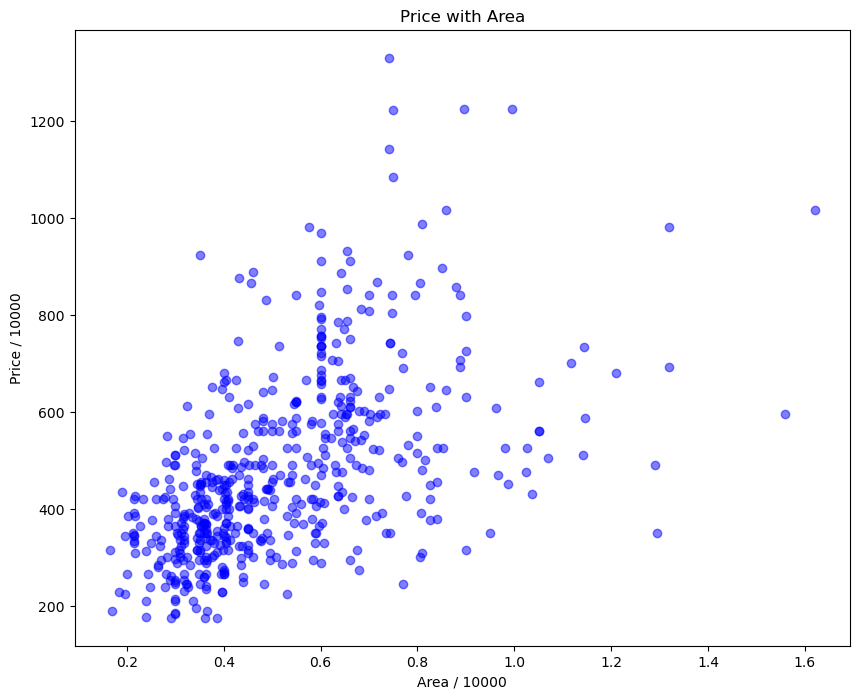

In [8]:
# Scatter x and y to see the relationship
plt.figure(figsize=(10, 8))
plt.title('Price with Area')
plt.scatter(X[:, 1], y, color='blue', marker='o', alpha=0.5)
plt.xlabel('Area / 10000')
plt.ylabel('Price / 10000')
plt.show()

<h2 dir="rtl" align="left" style="line-height: 200%; font-family: Vazir; color: #0099cc">
<font face="Vazir" color="#0099cc">
Part 1: Simple linear regression
</font>
</h2>
<p>
<font face="Vazir" size=5>
We want to solve the problem of linear regression to predict the house price using the house area, first using the gradient descent method, and then using the normal equations. We will compare it with scikit-learn.
<br>
<br>
Linear regression for a single variable:
</font>
</p>

Linear estimator:
$ h_\theta (x) = \theta_0 + \theta_1 x $

Regression coefficients:
$\theta_0 $, $\theta_1$

$m$ = Number of training examples <br><br>
$n$ = Number of features (in the case of a single variable, it is 1) <br><br>
$\alpha$ = Learning rate

<p>
<font face="Vazir" size=5>
The goal of the problem is to minimize the cost function J. In the case of simple linear regression, the cost function is defined as follows:
</font>
</p>

$$J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i = 1}^m \Bigl(h_\theta (x^{(i)}) - y^{(i)}\Bigr)^{2}$$

<p>
<font face="Vazir" size=5>
Where the hypothesis is defined as:
</font>
</p>

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$


<h3 dir=rtl align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Gradient Descent Algorithm
</font>
</h3>
<p>
<font face="vazir" size=5>
In each step of this algorithm, first, the derivative of the cost function is calculated, and the regression coefficients are updated using it according to the following formula. This process continues until the convergence of the algorithm.

</font>
</p>

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J\Bigl(\theta_0, \theta_1\Bigr)$$

<p>
<font face="vazir" size=5>Where for j=0:
</font>
</p>

$$\frac{\partial}{\partial \theta_0} J\Bigl(\theta_0, \theta_1\Bigr) = \frac{1}{m}\sum_{i = 1}^m \Bigl(h_\theta (x^{(i)}) - y^{(i)}\Bigr)$$

<p>
<font face="vazir" size=5>And for j's other than 0:
</font>
</p>

$$\frac{\partial}{\partial \theta_j} J\Bigl(\theta_0, \theta_1\Bigr) = \frac{1}{m}\sum_{i = 1}^m \Bigl(h_\theta (x^{(i)}) - y^{(i)}\Bigr)x^{(i)}$$


In [9]:
# Define the cost function
def computeCost(X, y, theta_gd):
    y_hat = X @ theta_gd
    m = X.shape[0]
    J = (y_hat - y).T @ (y_hat - y) / (2 * m)
    J = J[0][0]
    return(J)

In [10]:
# Initialize theta to zeros
theta_initial = np.zeros((X.shape[1], 1))
J_initial = computeCost(X, y, theta_gd=theta_initial)
print(f'J_initial = {J_initial: .4f}')

J_initial =  131069.1636


In [11]:
# Implement gradient descent
def gradientDescent(X, y, theta_gd, alpha, num_iters):
    J_history = np.zeros(num_iters)
    theta_gd_history = np.zeros((X.shape[1], num_iters))
    m = X.shape[0]
    for i in range(num_iters):
        gradient = X.T @ (X @ theta_gd - y) / m
        theta_gd = theta_gd - alpha * gradient
        theta_gd_history[:, i] = theta_gd.reshape(X.shape[1],)
        J_history[i] = computeCost(X, y, theta_gd)
        
    return(theta_gd, J_history, theta_gd_history) 

In [12]:
# Train the model
alpha = 1
num_iters = 10000
theta_gd = theta_initial.copy()
theta_gd_best, J_history, theta_gd_history = gradientDescent(X, y, theta_gd, alpha, num_iters)
cost_gd_min = J_history[-1]
print(f'Best theta (for gradient descent):')
for i in range(X.shape[1]):
    print(f'    theta {i} = {theta_gd_best[i][0]}')
print()
print(f'Minimum cost (for gradient descent) = {cost_gd_min}')

Best theta (for gradient descent):
    theta 0 = 238.7308482396436
    theta 1 = 461.9748942727824

Minimum cost (for gradient descent) = 12444.306990903287


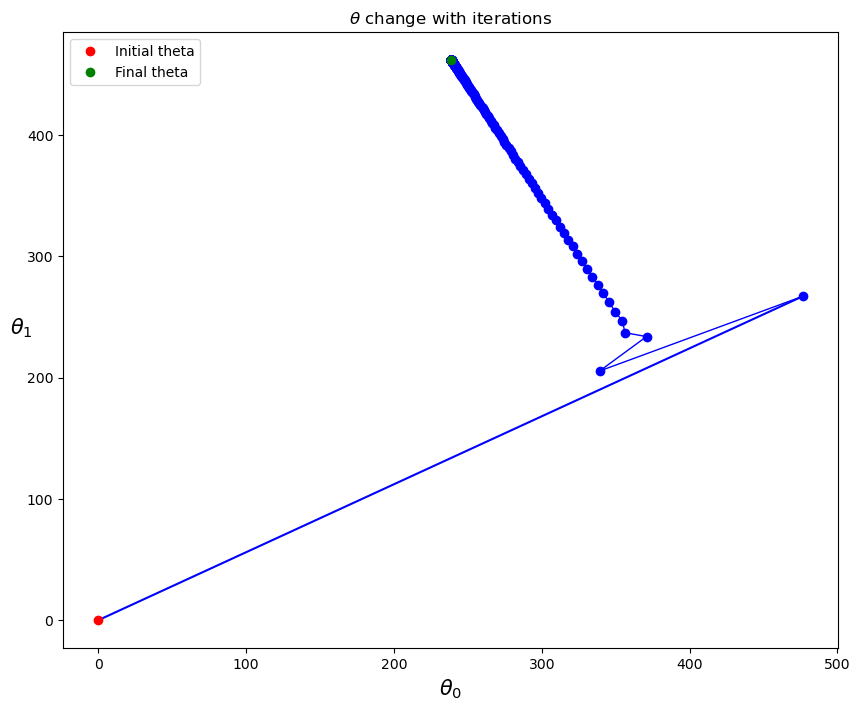

In [13]:
# Plot theta change with iterations
plt.figure(figsize=(10, 8))
thx, thy = theta_gd_history[:, 0]
plt.plot([0, thx], [0, thy], color='blue')
plt.plot(theta_gd_history[0,:], theta_gd_history[1,:], 'b-o', linewidth=1)
plt.plot(theta_initial[0], theta_initial[1], 'ro', label='Initial theta')
plt.plot(theta_gd_best[0], theta_gd_best[1], 'go', label='Final theta')
plt.title(r"$\theta$ change with iterations")
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.xlabel(r"$\theta_0$", fontsize=15)
plt.ylabel(r"$\theta_1$", fontsize=15, rotation=0)
plt.legend(loc="upper left", fontsize=10)
plt.show()

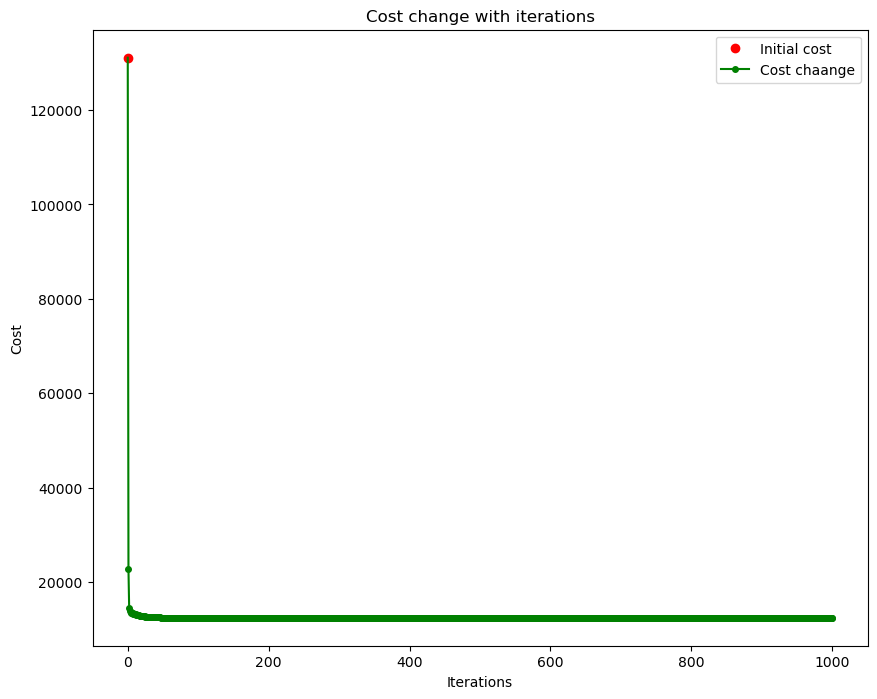

In [14]:
# Plot cost change with iterations
kth_iter = 1000
plt.figure(figsize=(10, 8))
plt.plot(J_initial, 'ro', label='Initial cost')
plt.plot(np.arange(1, kth_iter + 1), J_history[:kth_iter], 'g-o', markersize=4, label='Cost chaange')
plt.plot([0, 1], [J_initial, J_history[0]], color='green')
plt.title('Cost change with iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [15]:
# Plost the cost function surface and the path of gradient descent (3D)
kth_iter = 500
def cost_function(theta0, theta1):
    return computeCost(X, y, np.array([[theta0], [theta1]]))

thetas = np.concatenate((theta_initial, theta_gd_history), axis=1)
theta0_values = thetas[0, :kth_iter + 1].flatten()
theta1_values = thetas[1, :kth_iter + 1].flatten()
theta0_space = np.linspace(0, 500, 100)
theta1_space = np.linspace(0, 500, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_space, theta1_space)

cost_values_surface = np.vectorize(cost_function)(theta0_grid, theta1_grid)
cost_values_path = np.vectorize(cost_function)(theta0_values, theta1_values)
fig = go.Figure(data=[
    go.Surface(z=cost_values_surface, x=theta0_grid, y=theta1_grid),
    go.Scatter3d(x=theta0_values, y=theta1_values, z=cost_values_path, marker=dict(size=4, color='green'))
])
    
# set fig size
fig.update_layout(width=800, height=800)
fig.update_layout(
    scene=dict(
        xaxis_title=r'Theta 0',
        yaxis_title=r'Theta 1',
        zaxis_title='J',
    )
)

# plt.show()
fig.show()

<left>
<img src="3D.png">
</left>

<h3 dir=rtl align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Normal Equations
</font>
</h3>

<p>
<font face="vazir" size=5>
Now we want to solve the linear regression problem using the normal equations. The advantages of this method are that it does not require data normalization or standardization. Also, it does not require the use of loops to reach the optimum point. Its disadvantages include the difficulty of calculating the inverse matrix in high dimensions and the need to handle the X^T.X matrix in case it is not invertible. The regression coefficients in this method are calculated using the following formula:
</font>
</p>

$$\theta  = \big(X^TX\Big)^{-1}X^Ty$$


In [16]:
# Define the normal equation
def normalEqn(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [17]:
# Train the model using normal equation
theta_nrml_best = normalEqn(X, y)
cost_nrml_min = computeCost(X, y, theta_nrml_best)
print(f'Best theta (for normal equation):')
for i in range(X.shape[1]):
    print(f'    theta {i} = {theta_nrml_best[i][0]}')
print()
print(f'Minimum cost (for normal equation) = {cost_nrml_min}')

Best theta (for normal equation):
    theta 0 = 238.73084823964348
    theta 1 = 461.97489427278276

Minimum cost (for normal equation) = 12444.306990903287


<h3 dir=rtl align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
scikit-learn library</font>
</h3>

In [18]:
lg = LinearRegression()
lg.fit(X[:, 1:], y)
theta_skl_best = np.array([[lg.intercept_[0]], [lg.coef_[0][0]]])
cost_skl_min = computeCost(X, y, theta_skl_best)
print(f'Best theta (for sklearn):')
for i in range(X.shape[1]):
    print(f'    theta {i} = {theta_nrml_best[i][0]}')
print()
print(f'Minimum cost (for sklearn) = {cost_skl_min}')

Best theta (for sklearn):
    theta 0 = 238.73084823964348
    theta 1 = 461.97489427278276

Minimum cost (for sklearn) = 12444.306990903286


<h3 dir=rtl align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Evaluation
</font>
</h3>

<p>
<font face="vazir" size=5>
We use R2 score for evaluation:

</font>
</p>


$$ R^2 = 1 - \left(\frac{SS_{\text{Residual}}}{SS_{\text{Total}}}\right) $$

<p>
<font face="vazir" size=5>Where:
</font>
</p>

$$SS_{\text{Total}} = \sum_{i=1}^{m} (y^{(i)} - \mu)^2$$
$$SS_{\text{Residual}} = \sum_{i=1}^{m} (y^{(i)} - y^{(i)}_{pred})^2$$


In [19]:
# Define the R2 score function
def calculate_r2_score(y_true, y_pred):
    mu = y_true.mean()
    SS_total = (y_true - mu).T @ (y_true - mu) 
    SS_residual = (y_true - y_pred).T @ (y_true - y_pred) 
    r2 = 1 - (SS_residual / SS_total)
    return r2[0][0] 

In [20]:
# Calculate R2 score for the three models and compare

y_pred_gd = X @ theta_gd_best
r2_gd = calculate_r2_score(y, y_pred_gd)

y_pred_nrml = X @ theta_nrml_best
r2_nrml = calculate_r2_score(y, y_pred_nrml)

y_pred_skl = X @ theta_skl_best
r2_skl= calculate_r2_score(y, y_pred_skl)

print(f'R2 Score for gradiante decent = {r2_gd}')
print(f'R2 Score for normal equation = {r2_nrml}')
print(f'R2 Score for sklearn = {r2_skl}')

R2 Score for gradiante decent = 0.2872931546811467
R2 Score for normal equation = 0.2872931546811467
R2 Score for sklearn = 0.2872931546811468


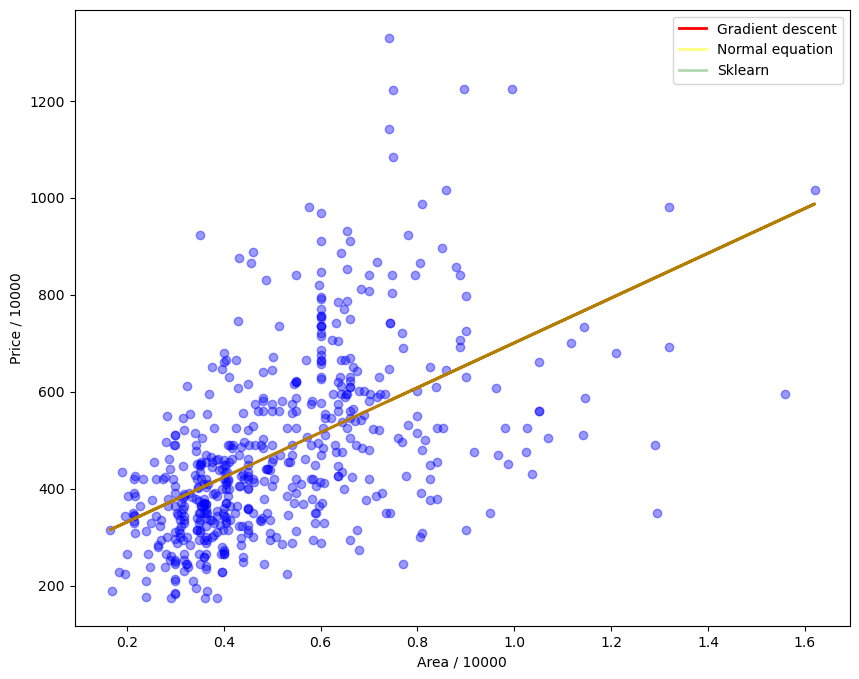

In [21]:
# Plot the three models in one figure and compare them
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 1], y, color='blue', marker='o', alpha=0.4)
plt.plot(X[:, 1], y_pred_gd, color='red', linewidth=2, label='Gradient descent')
plt.plot(X[:, 1], y_pred_nrml, color='yellow', linewidth=2, label='Normal equation', alpha=0.5)
plt.plot(X[:, 1], y_pred_skl, color='green', linewidth=2, label='Sklearn', alpha=0.3)
plt.xlabel('Area / 10000')
plt.ylabel('Price / 10000')
plt.legend()
plt.show()

<h2 dir=rtl align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Part 2: Multiple Regression
</font>
</h2>
<p>
<font face="vazir" size=5>
In the second part, we want to use other numerical features available in the dataframe and practice implementing multiple regression. For this purpose, we need a new definition for the feature matrix.
</font>
</p>


In [22]:
# Put all numerical values except the target variable (house price) into the matrix X.
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = df[numeric_features] 

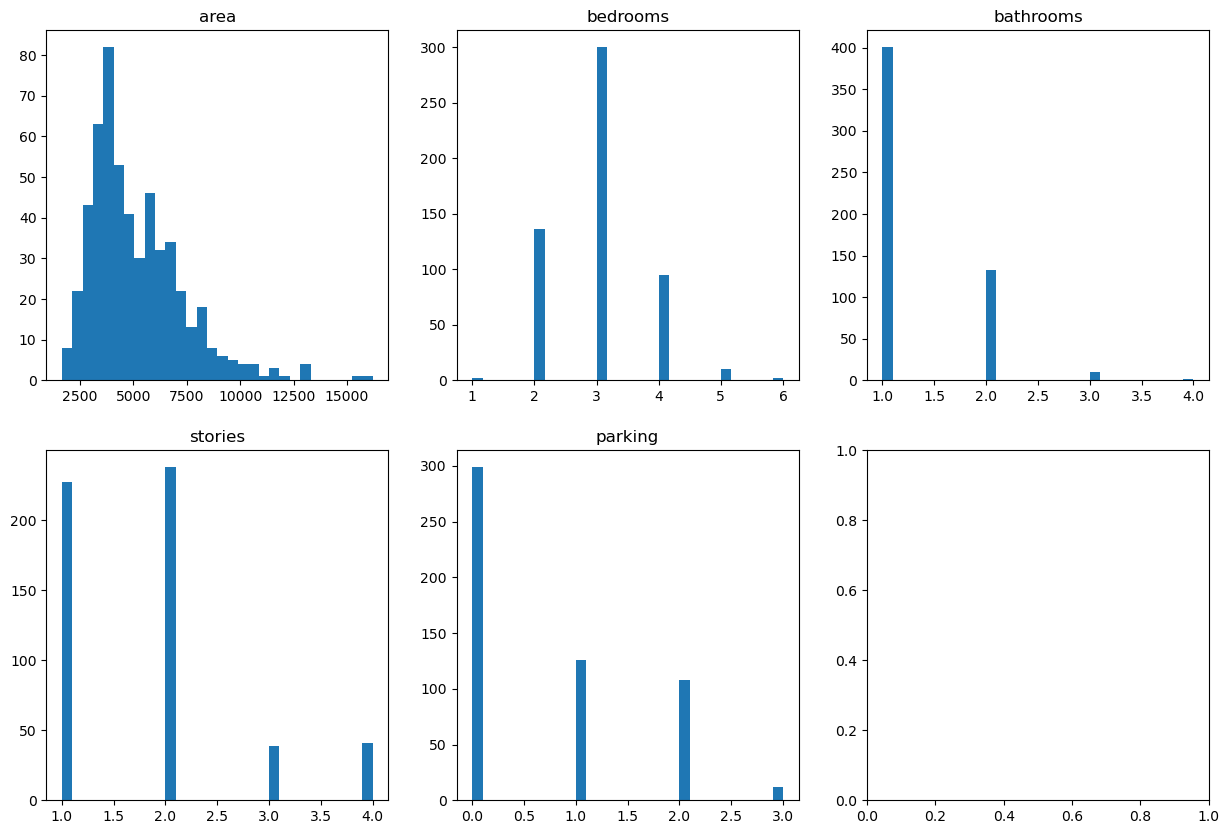

In [23]:
# Plot histograms of features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, ax in enumerate(axes.ravel()[:-1]):
    ax.hist(X.iloc[:, i], bins=30)
    ax.set_title(X.columns[i])

<p>
<font face="vazir" size=5>
As you can see, the values of these five features are in very different ranges. To accelerate the convergence process of the gradient descent algorithm and prevent the dominance of one or more features over others, it is necessary to standardize the data. The standardization formula is as follows:
</font>
</p>

$$x_i :=\frac{x_i - \mu_i}{S_i}$$

Where:

$\mu_i$ = Mean of the feature

$S_i$ = Standard deviation of the feature
</font></p>


In [24]:
# Define a standard scaler
def normalize_features(X):
   X_norm = X.copy()
   mu = X.mean()
   sigma = X.std()
   X_norm = (X_norm - mu) / sigma
   return X_norm

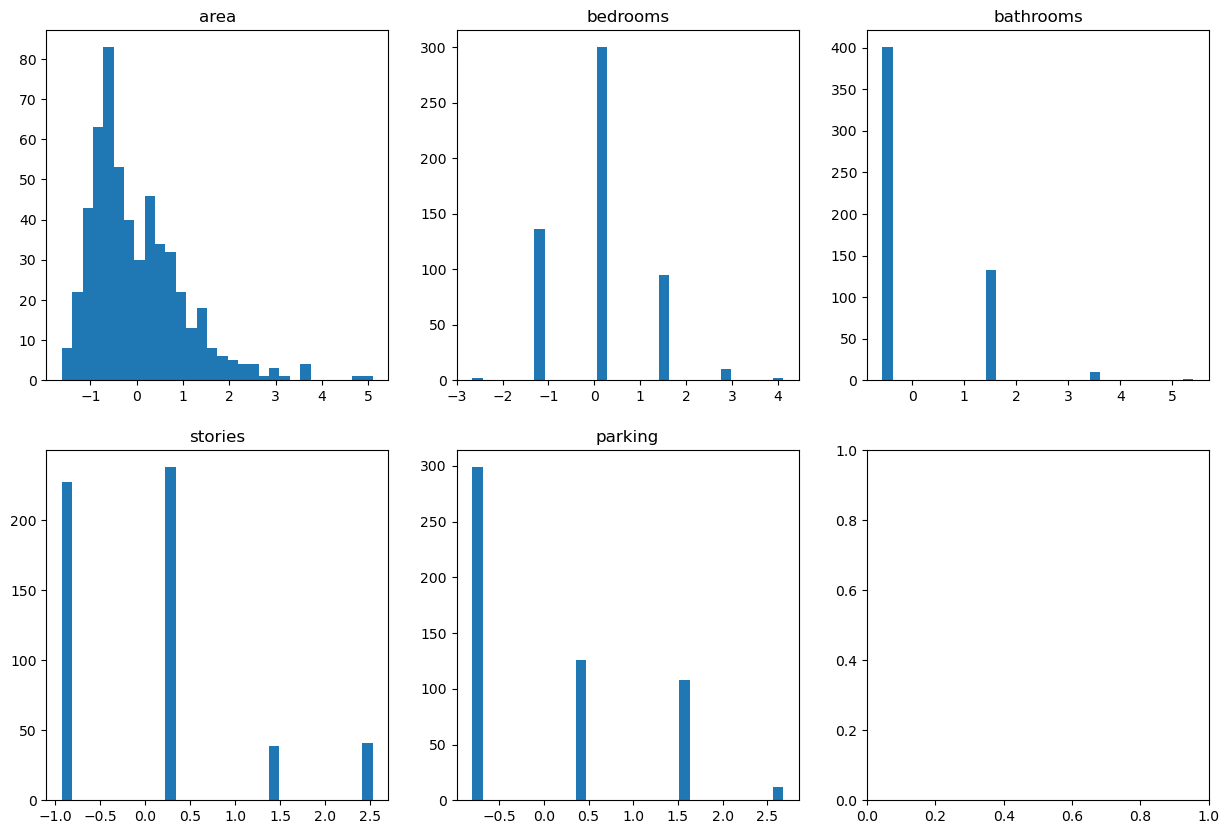

In [25]:
# Normalize features and plot histograms again
X = normalize_features(X)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, ax in enumerate(axes.ravel()[:-1]):
    ax.hist(X.iloc[:, i], bins=30)
    ax.set_title(X.columns[i])

In [26]:
# Add a column of 1s to X
X = np.c_[np.ones(X.shape[0]), X]

In [27]:
# Define the cost function for multiple variables
def computeCostMulti(X, y, theta_gd):
    return computeCost(X, y, theta_gd) 

In [28]:
# Define the gradient descent function for multiple variables
def gradientDescentMulti(X, y, theta_gd, alpha, num_iters):
    return gradientDescent(X, y, theta_gd, alpha, num_iters)

In [29]:
# Train multiple variable model using gradient descent
alpha = 0.1
num_iters = 300
theta_initial = np.zeros((X.shape[1], 1))
theta_gd_multi = theta_initial.copy()
theta_gd_multi_best, J_history_multi, theta_gd_history_multi = gradientDescentMulti(X, y, theta_gd_multi, alpha, num_iters)
cost_gd_multi_min = J_history_multi[-1]
print(f'Best theta (for gradient descent, multi):')
for i in range(X.shape[1]):
    print(f'    theta {i} = {theta_gd_multi_best[i][0]}')
print()
print(f'Minimum cost (for gradient descent, multi) = {cost_gd_multi_min}')

Best theta (for gradient descent, multi):
    theta 0 = 476.6729247706333
    theta 1 = 71.8567319456869
    theta 2 = 12.385434436041123
    theta 3 = 56.966998311579545
    theta 4 = 47.533365163938555
    theta 5 = 32.53315813288759

Minimum cost (for gradient descent, multi) = 7655.042813341991


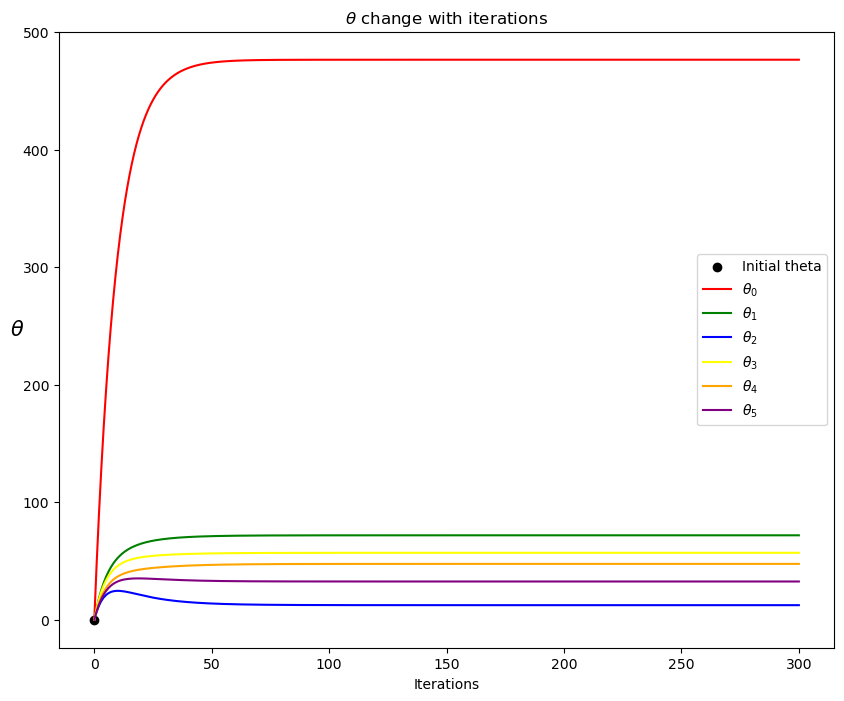

In [30]:
# Plot and compare thetas change with iterations
plt.figure(figsize=(10, 8))
plt.scatter([0], [0], c='black', label='Initial theta')
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple']
thetas = np.concatenate((theta_initial, theta_gd_history_multi), axis=1)
for i in range(X.shape[1]):
    plt.plot(thetas[i,:], c=colors[i], label=r'$\theta_{}$'.format(i))
plt.title(r"$\theta$ change with iterations")
plt.xlabel('Iterations')
plt.ylabel(r'$\theta$', rotation=0, fontsize=15)
plt.legend()
plt.show()

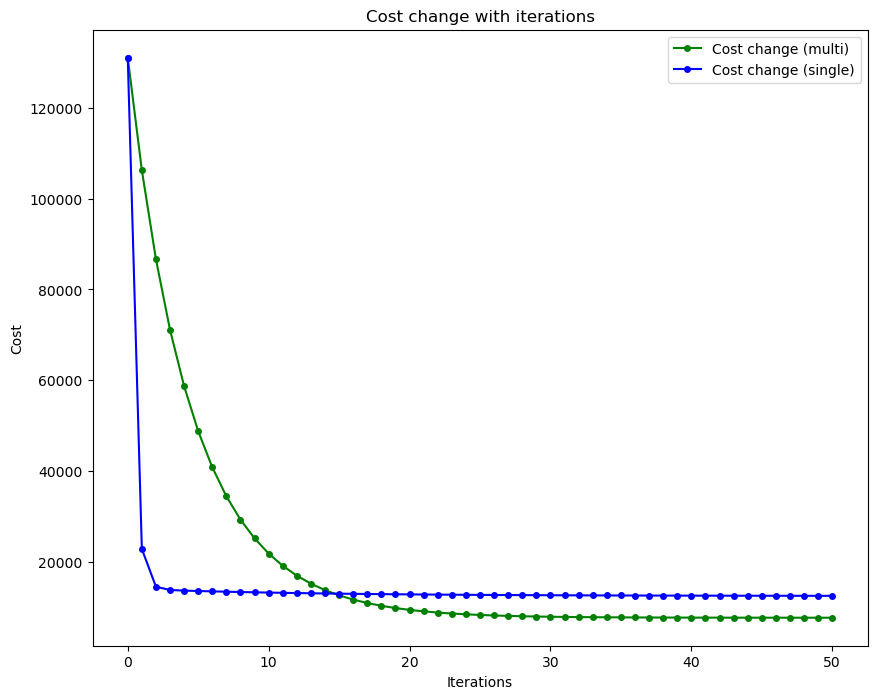

In [31]:
# Compare the cost change for multi and single
kth_iter = 50
Js_multi = np.concatenate(([J_initial], J_history_multi))
Js_single = np.concatenate(([J_initial], J_history))
plt.figure(figsize=(10, 8))
plt.plot(Js_multi[:kth_iter + 1], 'g-o', markersize=4, label='Cost change (multi)')
plt.plot(Js_single[:kth_iter + 1], 'b-o', markersize=4, label='Cost change (single)')
plt.title('Cost change with iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

<p dir=rtl align=left style="direction: rtl;text-align: left;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=5><i>
The convergence speed of the algorithm in the single-variable case is higher than the multi-variable case, and the algorithm finds the optimum point more quickly. The main reason for this is that the space the algorithm has to search to find the optimal solution is smaller in the single-variable case (2-dimensional space in the first part, whereas 6-dimensional space in this part). Additionally, in the multi-variable case, the chance of an increase in the complexity of the space is higher
</i></font></p>


In [32]:
# Calculate R2 score for multi and single and compare
r2_gd_multi = calculate_r2_score(y, X @ theta_gd_multi_best)
print(f'R2 Score (for gradiante decent, single) = {r2_gd}')
print(f'R2 Score (for gradiante decent, multi) = {r2_gd_multi}')

R2 Score (for gradiante decent, single) = 0.2872931546811467
R2 Score (for gradiante decent, multi) = 0.5615825438679801


<p dir=rtl style="direction: rtl;text-align: left;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=5><i>
The R2 value in the multi-variable case has increased compared to the single-variable case, and this change was expected. This is because, in the multi-variable case, due to the increase in the number of parameters and degrees of freedom, the model is more complex than the model built in the single-variable case. Therefore, it can predict the target variable more accurately, leading to an increase in R2.
</i></font></p>


<p>
<font face="vazir" size=5>
Now we want to examine the effect of changing the learning rate on the convergence process of the gradient descent algorithm.
</font>
</p>

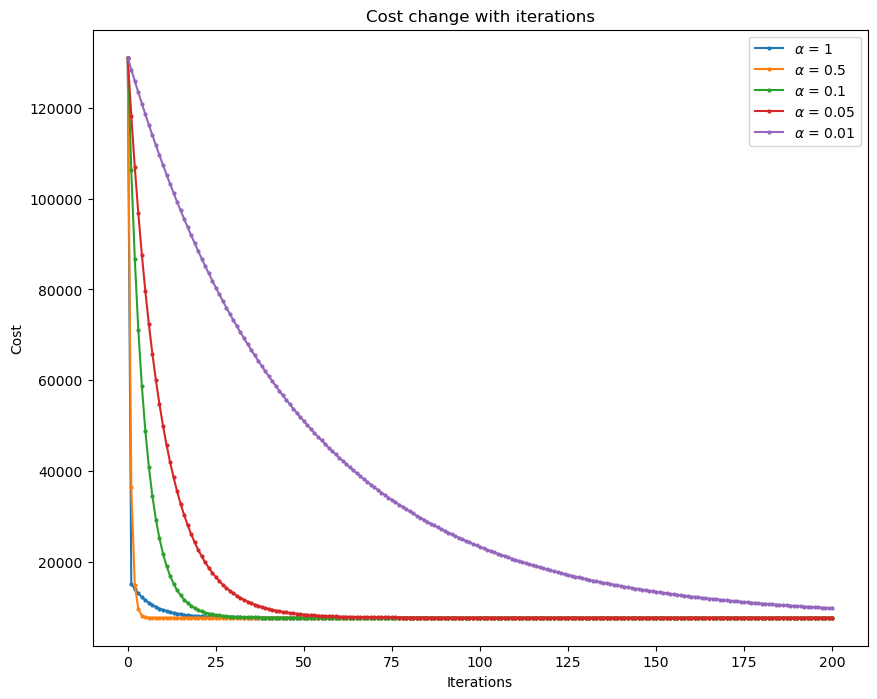

In [33]:
# Run gradient descent with different learning rates in multi variable case
alphas = [1, 0.5, 0.1, 0.05, 0.01]
num_iters = 200

plt.figure(figsize=(10, 8))
for alpha in alphas:
    theta_gd = theta_initial.copy()
    theta_gd_best, J_history, theta_gd_history = gradientDescentMulti(X, y, theta_gd, alpha, num_iters)
    Js = np.concatenate(([J_initial], J_history))
    plt.plot(Js, 'o-', markersize=2, label=r'$\alpha$ = {}'.format(alpha))
    
plt.title('Cost change with iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

<p dir=rtl style="direction: rtl;text-align: left;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=5><i>
The convergence speed of the algorithm increases with the increase in the learning rate, which is expected. This is because increasing the alpha value lengthens each step in the learning process, helping the algorithm reach the optimum point sooner
</i></font></p>


In [34]:
# Solve the multi regression problem using normal equation
theta_nrml_multi_best = normalEqn(X, y)
cost_nrml_multi_min = computeCost(X, y, theta_nrml_multi_best)
print(f'Best theta (for normal equation, multi):')
for i in range(X.shape[1]):
    print(f'    theta {i} = {theta_nrml_multi_best[i][0]}')
print()
print(f'Minimum cost (for gradient descent, multi) = {cost_nrml_multi_min}')

Best theta (for normal equation, multi):
    theta 0 = 476.6729247706422
    theta 1 = 71.85673195476343
    theta 2 = 12.385434001511625
    theta 3 = 56.966998424831374
    theta 4 = 47.533365488953926
    theta 5 = 32.533158178153315

Minimum cost (for gradient descent, multi) = 7655.04281334199


<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Part 3: Regularization (Polynomial Regression)
</font>
</h2>


In [35]:
# Let's have only one feature (area) again
X = df['area']
X = normalize_features(X).values.reshape(-1, 1)

In [36]:
# Add 12 polynomial features to X
num_degrees = 12
poly = PolynomialFeatures(degree=num_degrees)
X_pol = poly.fit_transform(X)
X_pol.shape

(545, 13)

In [37]:
# Train the model using multiple linear regression in sklearn
lrg_poly = LinearRegression()
lrg_poly.fit(X_pol, y)
theta_poly_best = np.concatenate((lrg_poly.intercept_.reshape(1,1), lrg_poly.coef_), axis=1).T
print(f'Best theta (for poly):')
for i in range(1 + num_degrees):
    print(f'    theta {i} = {theta_poly_best[i][0]}')

Best theta (for poly):
    theta 0 = 495.27956357311416
    theta 1 = 0.0
    theta 2 = 171.64848198099122
    theta 3 = 14.480089931027468
    theta 4 = 14.916247871810377
    theta 5 = -47.79753416233525
    theta 6 = -52.48602398960551
    theta 7 = 42.76024863829915
    theta 8 = 11.781813895420356
    theta 9 = -13.496652540323652
    theta 10 = 1.6927005811647708
    theta 11 = 0.7449174094295077
    theta 12 = -0.21806454306173936


<p>
<font face="vazir" size=5>
Now, we want to use regularization (L2) to prevent overfitting of the model.
</font>
</p>


<p>
<font face="vazir" size=5>
The formulas you see below are for L2 regularization, also known as Ridge regression. In other techniques like Lasso or Elastic Net, this term appears differently.
</font>
</p>

$$ J(\theta) = \frac{1}{(2m)}\bigg[\sum_{i = 1}^m \Bigl(h_\theta (x^{(i)}) - y^{(i)}\Bigr)^{2} + \lambda\sum_{j = 1}^{n}\theta_{j}^{2}\bigg]$$

<p>
<font face="vazir" size=5>For linear regression:</font>
</p>

$$h_{\theta}(x) = \theta^Tx$$

<p>
<font face="vazir" size=5>The gradient descent algorithm with this change in the cost function would be as follows. For theta_0:</font>
</p>

$$\theta_0 : = \theta_0- \alpha\frac{\partial J(\theta)}{\partial\theta_{0}}$$
$$ \frac{\partial J(\theta)}{\partial\theta_{0}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{0} $$

<p>
<font face="vazir" size=5>For regression coefficients other than theta_0:</font>
</p>

$$\theta_j : = \theta_j- \alpha\Big[\Big(\frac{\partial J(\theta)}{\partial\theta_{j}}\Big) + \frac{\lambda}{m}\theta_{j}\Big] $$
$$ \frac{\partial J(\theta)}{\partial\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} +\frac{\lambda}{m}\theta_{j}$$

<p>
<font face="vazir" size=5>And vectorized form:</font>
</p>

for j = 0 
$$\frac{\partial J(\theta)}{\partial\theta_{0}} = \frac{1}{m} X^T(h-y)$$
for j = 1,2,3... n
$$\frac{\partial J(\theta)}{\partial\theta_{j}} = \frac{1}{m} X^T(h-y) + \frac{\lambda}{m}\theta_{j}$$


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
</font>
</p>


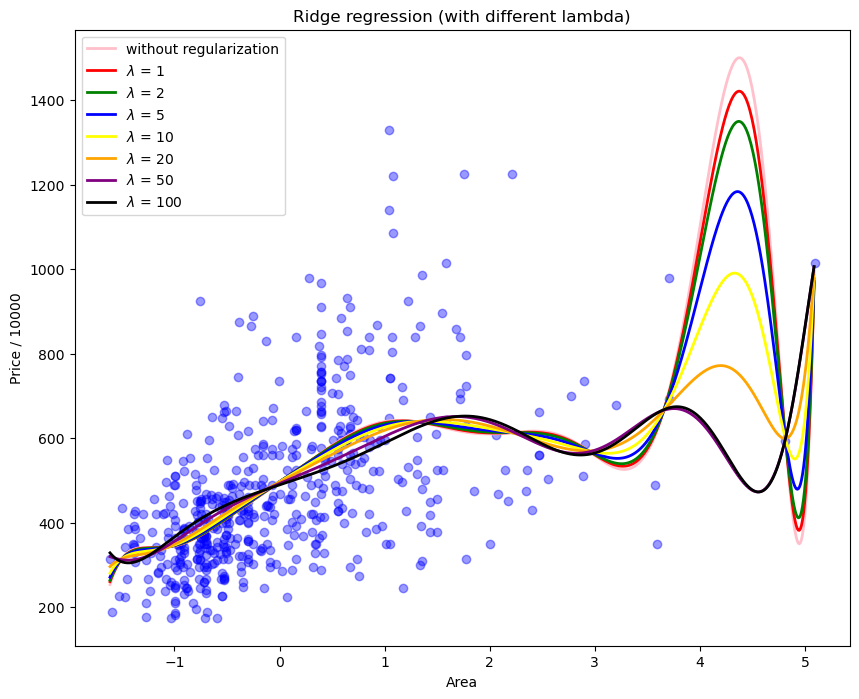

In [38]:
# Use L2 regularization with different lamdas in ploynomial regression
landas = [1,2,5,10,20,50,100]
landas_colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'black', 'brown']
plt.figure(figsize=(10, 8))
plt.scatter(X, y, color='blue', marker='o', alpha=0.4)
X_test = np.arange(X.min(), X.max(), 0.01).reshape(-1, 1)
X_pol_test = poly.fit_transform(X_test)
y_pred = lrg_poly.predict(X_pol_test)
plt.plot(X_test, y_pred, color='pink', linewidth=2, label='without regularization')

for i, landa in enumerate(landas):
    ridge = Ridge(alpha=landa)
    ridge.fit(X_pol, y)
    y_pred = ridge.predict(X_pol_test)
    plt.plot(
        X_test, 
        y_pred, 
        color=landas_colors[i], 
        linewidth=2, label=(r'$\lambda$ = {}'.format(landa)))
    
plt.title('Ridge regression (with different lambda)')
plt.xlabel('Area')
plt.ylabel('Price / 10000')
plt.legend()
plt.show()

<p dir=rtl style="direction: rtl;text-align: left;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc"><font face="vazir" size=5><i>
As the lambda coefficient increases, the polynomial has fewer changes along the y-axis, appearing more constrained and having less power to fit the training data. These results were expected because as the lambda value increases, the magnitude of the parameters becomes more restricted. When we constrain the magnitude of the parameters in a polynomial, it cannot freely fluctuate along the y-axis as much as it could in case it has no constrains; even if it has 13 degrees of freedom
</i></font></p>
